In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
data = pd.read_csv('student-mat.csv')
data = pd.read_csv('student-por.csv')

# data.corr()

Проанализировать предметную область и набор данных на предмет закономерностей, понимания бизнес-целей и оценки их достижения

Спроектировать признаки и выбрать метрики оценки качества

Выбрать метод машинного обучения, обучить его и проверить качество обучения

Составить отчет о проделанной работе с обоснованием выбранных решений

https://www.kaggle.com/datasets/uciml/student-alcohol-consumption?resource=download

# Анализ предметной области и набора данных на предмет закономерностей

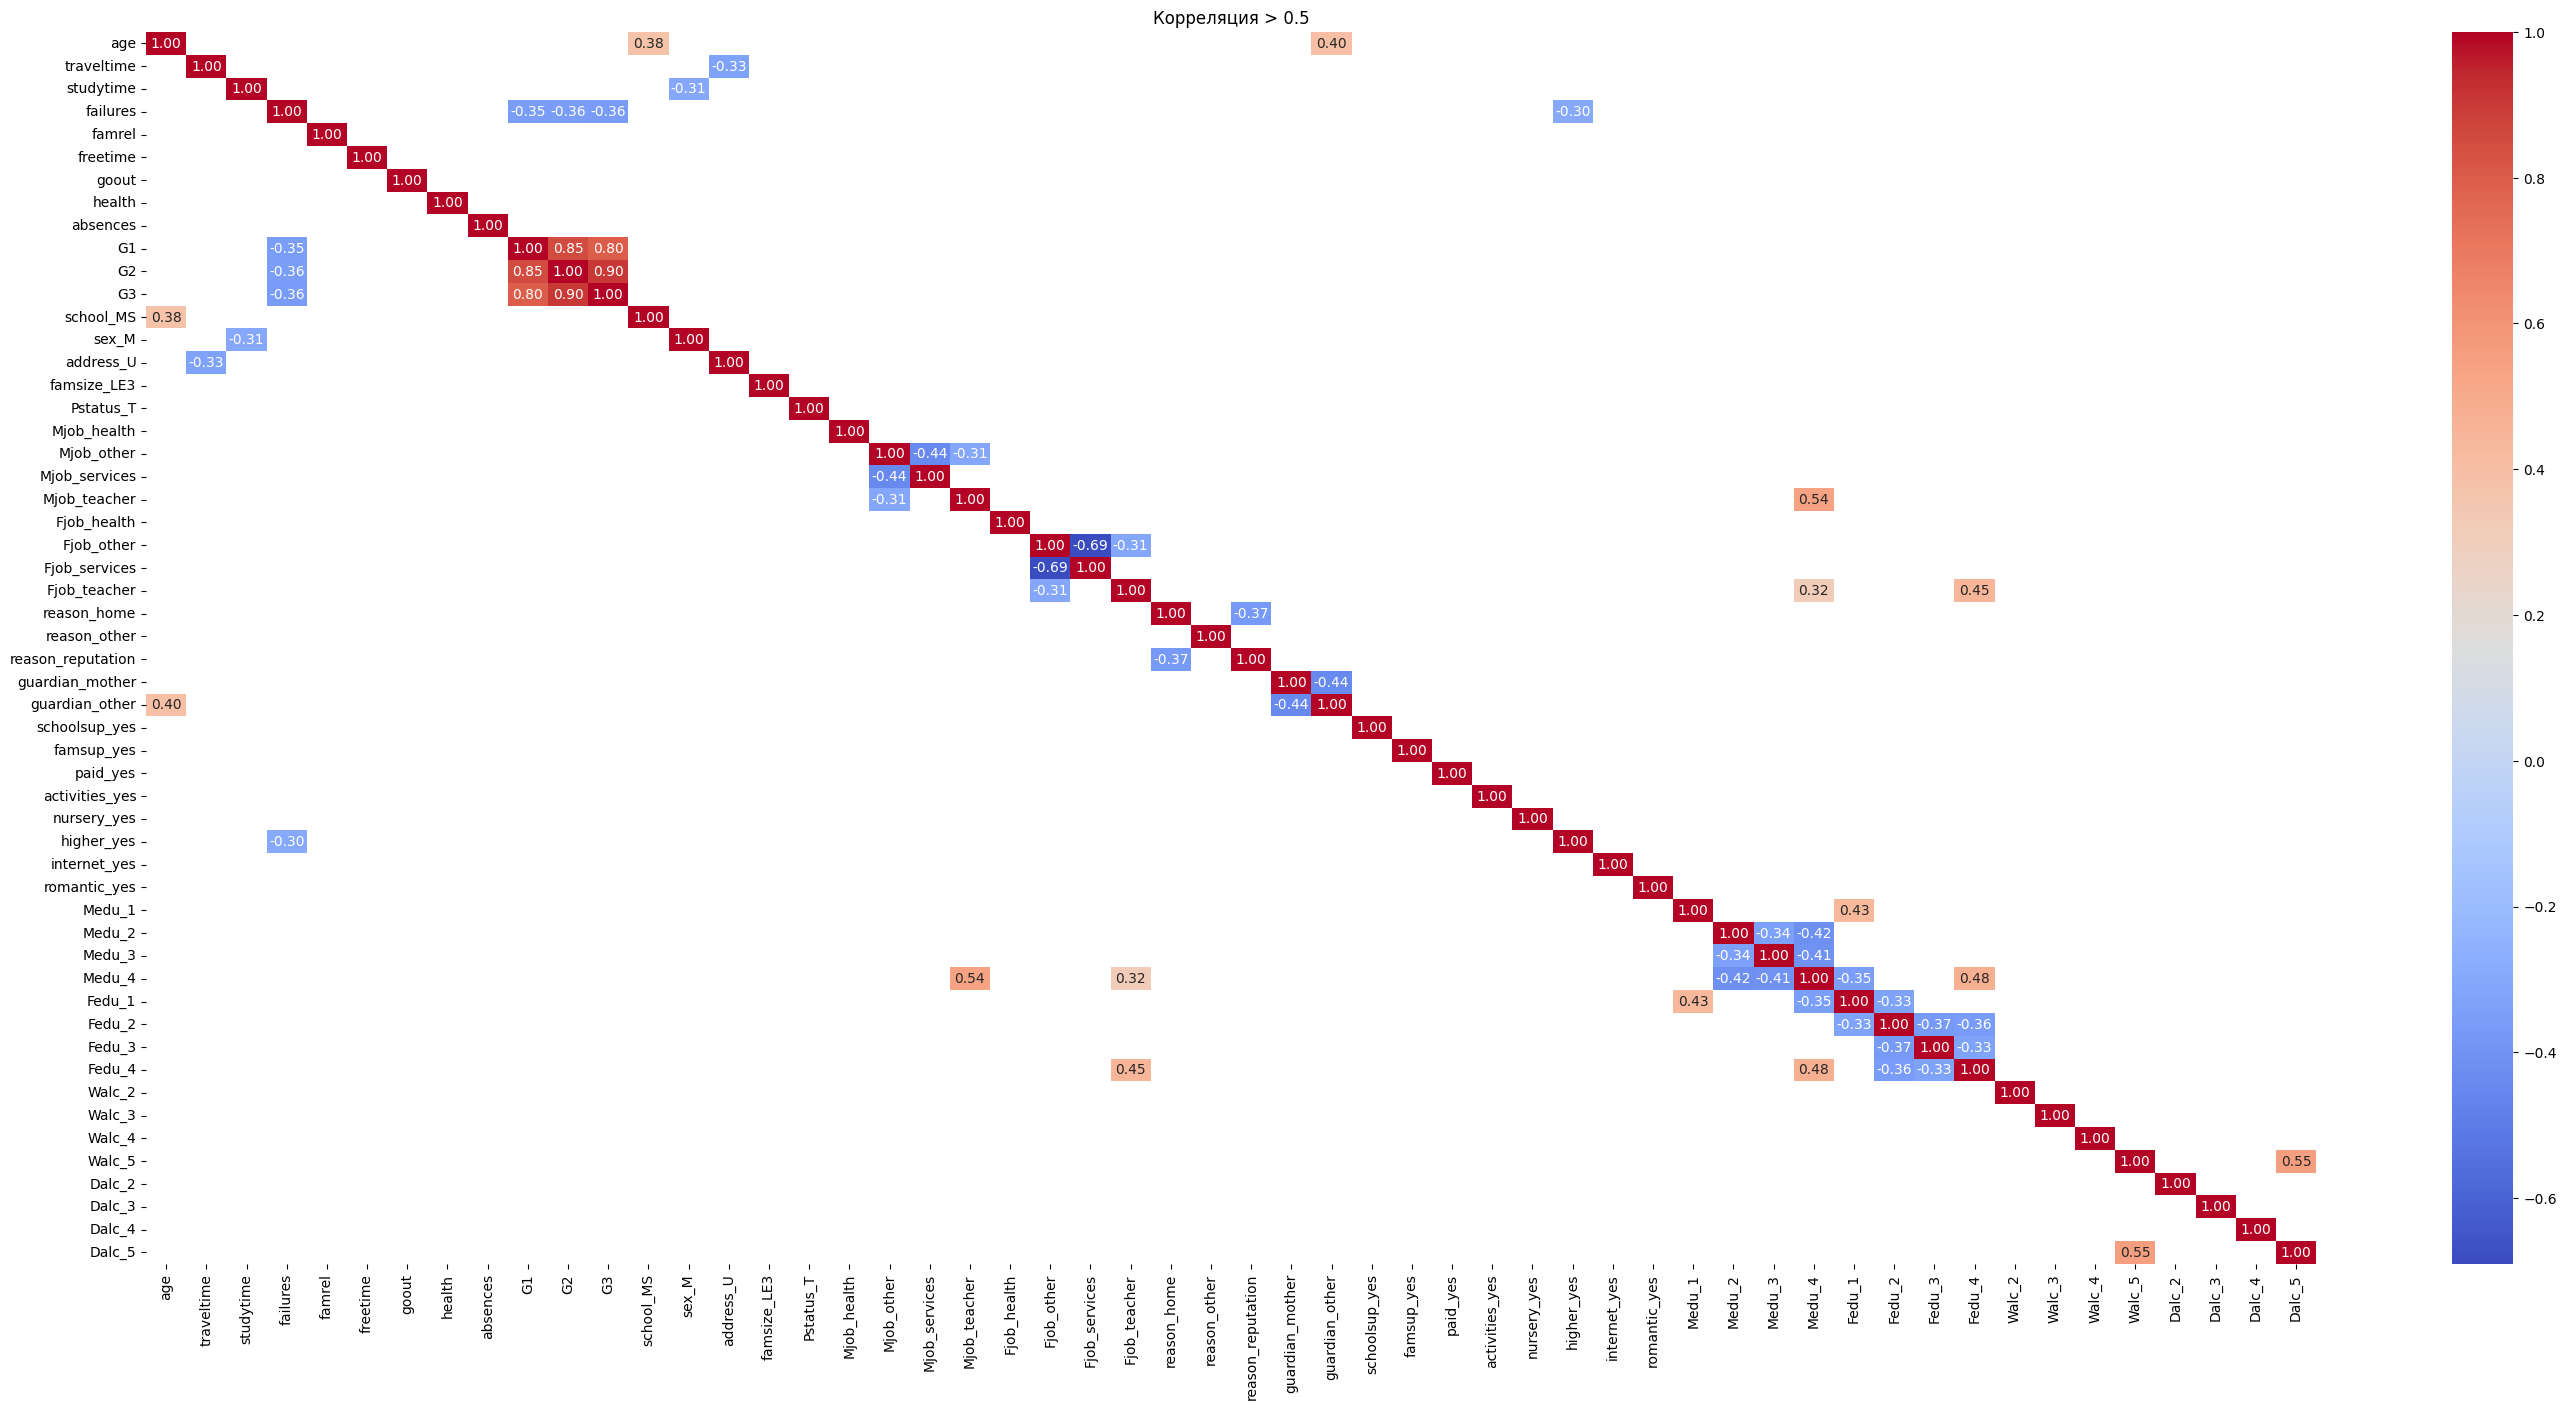

In [12]:
data = pd.read_csv('student-mat.csv')
# data = pd.read_csv('student-por.csv')
# Преобразование всех категориальных признаков в бинарные
data_dummies = pd.get_dummies(data, drop_first=True)
data_dummies_medu = pd.get_dummies(data_dummies["Medu"], prefix='Medu',  drop_first=True)
data_dummies_fedu = pd.get_dummies(data_dummies["Fedu"], prefix='Fedu', drop_first=True)
data_dummies_Walc = pd.get_dummies(data_dummies["Walc"], prefix='Walc', drop_first=True)
data_dummies_Dalc = pd.get_dummies(data_dummies["Dalc"], prefix='Dalc', drop_first=True)
# Проверка результата
# print(data_dummies.head())
data=  pd.concat([data_dummies, data_dummies_medu,data_dummies_fedu, data_dummies_Walc,data_dummies_Dalc], axis=1)
data.drop(['Medu', 'Fedu',"Dalc","Walc"], axis=1, inplace=True)
# Вычисление корреляции
correlation_matrix = data.corr()
# d
high_correlation = correlation_matrix[correlation_matrix.abs() > 0.3]
# high_correlation["G3
# # Визуализация отфильтрованной корреляционной матрицы
plt.figure(figsize=(35, 16))
sns.heatmap(high_correlation, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Корреляция > 0.5')
plt.show()

Переведя катигориальные признаки в бинарные и построив матрицу кореляции мы приходи к следющим выводам:
Общие закономерности:
* В школе  Mousinho da Silveira учаться люди старше
* Учителя имеют высшим образование обычно
* Люди с высшим образованием чаще женятся друг с другом
* Кто часто пьёт на недле, пьёт и в выходные
Закономерности относительно целевой метрики
* Успеваемость обратно пропоциональна "failures", однако из описания датасета не совсем понятно, что значит эта переменная(я перевёл это как пересдачи, но не понятно почему они начинаются с 1)
* Успеваемость в семестрах прямопорциональна оценке за экзамен

In [5]:
# list(correlation_matrix[abs(correlation_matrix["G3"])>0.1]["G3"].dropna().index)
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 19.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 27.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


# Проэктировка признаков и выбор метрик оценки качества
* В обучении будут использоваться признаки с абсолютной кореляцией > 0.2
* Метрики Средняя абсолютная ошибка (MAE), Среднеквадратичная ошибка (MSE), MSE на валидации, Коэффициент детерминации (R²), 

# Выбор метода машинного обучения, обучения его и проверка качества обучения
* Для решения задачи регрессии был выбран метод случайного леса, который хорошо подходит для работы с данными, содержащими как числовые, так и категориальные признаки.
* для проверки качества обучения была проведена кросс-валидация 5 фолдами

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Загрузка данных
# data = pd.read_csv('student-mat.csv')

# Предобработка данных
# data.fillna(data.mean(), inplace=True)  # Пример обработки пропусков
data = pd.get_dummies(data, drop_first=True)  # Кодирование категориальных переменных

# Разделение данных
X = data.drop('G3', axis=1)  # Замените 'target_column' на имя целевой переменной
y = data['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = RandomForestRegressor()
model.fit(X_train, y_train)


cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = (-cv_scores)  # Преобразование в RMSE
print("Cross-validated MSE:", cv_rmse.mean())

# Оценка качества на тестовой выборке
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Cross-validated MSE: 2.0879949503968254
Mean Absolute Error: 1.1841772151898737
Mean Squared Error: 3.8036265822784814
R² Score: 0.814502910792986


Mean Squared Error: 4.053843786851262


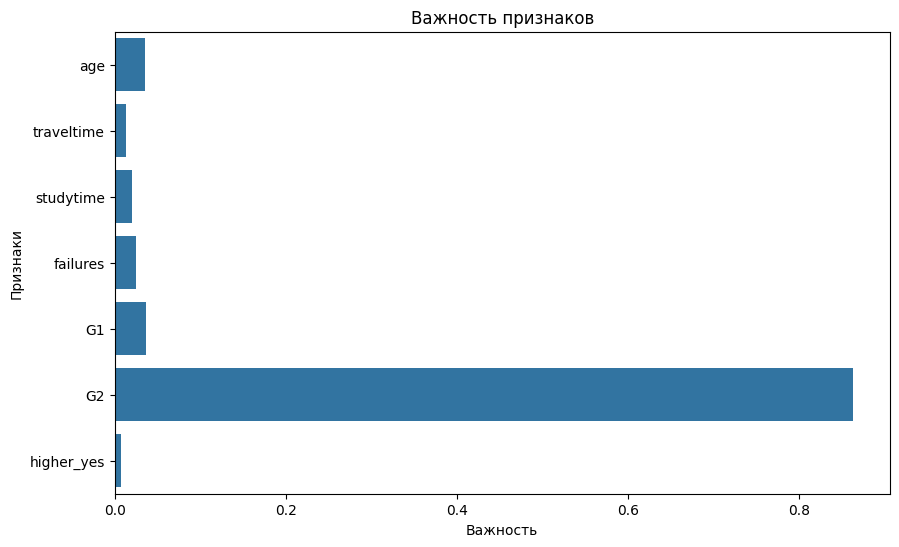

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# for column in data.columns:
#     data[column] = pd.to_numeric(data[column])
X = data[['age', 'traveltime', 'studytime', 'failures', 'G1', 'G2', 'higher_yes']]
y = data['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Визуализация важности признаков
feature_importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Важность признаков')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.show()